In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

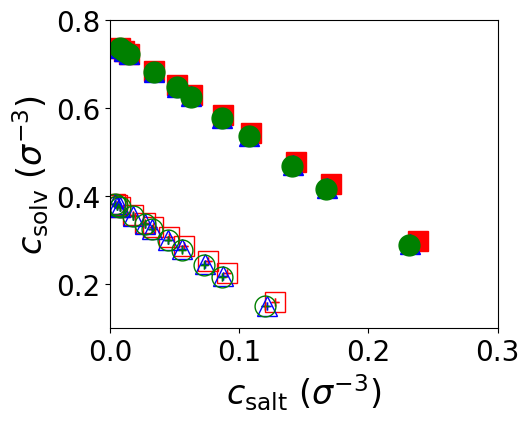

In [ ]:
base_dir = "./" 
os.chdir(base_dir)


concentrate_file = f"{base_dir}concentrate_volume.csv"
concentrate_data = pd.read_csv(concentrate_file)
for col in concentrate_data.columns:
    globals()[col] = concentrate_data[col].dropna().to_numpy()


color_map = {'02': 'red', '1': 'blue', '5': 'green'}
marker_map = {'02': 's', '1': '^', '5': 'o'}

fig, ax = plt.subplots(figsize=(5, 4))


for eps in ['02', '1', '5']:
    for pot in ['lj', 'wca']:
        csaltname = f"mean_c_salt_{eps}_{pot}"
        csalterrname = f"err_c_salt_{eps}_{pot}"
        csolvname = f"mean_c_solvent_{eps}_{pot}"
        csolverrname = f"err_c_salt_{eps}_{pot}"

        x = globals()[csaltname]
        xerr = globals()[csalterrname]

        y = globals()[csolvname]
        yerr = globals()[csolverrname]

        filled = (pot == "lj")
        ax.errorbar(
            x, y, xerr = xerr, yerr=yerr,
            fmt=marker_map[eps],
            markersize=15,
            color=color_map[eps],
            mfc=color_map[eps] if filled else 'none',
            mec=color_map[eps],
            ecolor=color_map[eps],
            elinewidth=1,
            capsize=3
        )
        
ax.set_xlim(0,0.3)
ax.set_ylim(0.1,0.8)
ax.tick_params(labelsize=20)
ax.set_xlabel(r'$c_{\mathrm{salt}}$ $(\sigma^{-3})$', fontsize=24)
ax.set_ylabel(r'$c_{\mathrm{solv}}$ $(\sigma^{-3})$', fontsize=24)

plt.show()
